In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pycaret
import mlflow

In [2]:
#Importing the dataset

df = pd.read_csv('../data/02_mushroom_data.csv')


In [3]:
# import pycaret classification and init setup
from pycaret.classification import *

s = setup(df, 
      target='class',
      feature_selection=True,
      n_features_to_select=0.2,
      remove_multicollinearity=True,
      multicollinearity_threshold=0.90,
      ordinal_features={'population':['scattered','numerous','abundant'],'ring-number':['none','one','two']},
      low_variance_threshold=0.2,
      categorical_imputation='drop',
      session_id = 123
      
      )

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(7932, 5)"
6,Transformed train set shape,"(5554, 5)"
7,Transformed test set shape,"(2378, 5)"
8,Ordinal features,2
9,Categorical features,22


In [4]:
s.get_config('dataset_transformed')

,cap-shape_flat,bruises,odor_none,gill-size,class
1287,1.0,1.0,1.0,0.0,0
6411,0.0,1.0,0.0,1.0,1
4564,0.0,1.0,0.0,0.0,1
3565,0.0,1.0,0.0,0.0,1
3892,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...
2789,0.0,0.0,1.0,0.0,0
2941,0.0,0.0,1.0,0.0,0
1296,0.0,0.0,1.0,0.0,0
4656,1.0,1.0,0.0,0.0,1


!!!!!  (For assignment purposes) For PyCaret, there seems to be some ongoing bug with it where compare_models() shows AUC as 0 for every model. However when you plot it inside a graph, AUC will be shown. Link to the verified bug post in pycaret github: https://github.com/pycaret/pycaret/issues/3916

In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9447,0.0000,0.9447,0.9450,0.9447,0.8894,0.8897,0.2900
rf,Random Forest Classifier,0.9447,0.0000,0.9447,0.9450,0.9447,0.8894,0.8897,0.3590
gbc,Gradient Boosting Classifier,0.9447,0.0000,0.9447,0.9450,0.9447,0.8894,0.8897,0.3640
et,Extra Trees Classifier,0.9446,0.0000,0.9446,0.9448,0.9446,0.8891,0.8894,0.6260
lightgbm,Light Gradient Boosting Machine,0.9442,0.0000,0.9442,0.9445,0.9442,0.8884,0.8886,0.6620
knn,K Neighbors Classifier,0.9409,0.0000,0.9409,0.9419,0.9409,0.8818,0.8828,0.4850
qda,Quadratic Discriminant Analysis,0.9368,0.0000,0.9368,0.9370,0.9368,0.8735,0.8738,0.2800
ada,Ada Boost Classifier,0.9301,0.0000,0.9301,0.9306,0.9300,0.8602,0.8607,0.3260
svm,SVM - Linear Kernel,0.9297,0.0000,0.9297,0.9316,0.9296,0.8593,0.8612,0.2860
lr,Logistic Regression,0.9292,0.0000,0.9292,0.9306,0.9291,0.8583,0.8598,2.6010


In [6]:
df2 = s.get_config('dataset_transformed')

In [7]:
df2 = df2.reset_index(drop=True)
df2

,cap-shape_flat,bruises,odor_none,gill-size,class
0,1.0,1.0,1.0,0.0,0
1,0.0,1.0,0.0,1.0,1
2,0.0,1.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,1
4,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...
7927,0.0,0.0,1.0,0.0,0
7928,0.0,0.0,1.0,0.0,0
7929,0.0,0.0,1.0,0.0,0
7930,1.0,1.0,0.0,0.0,1


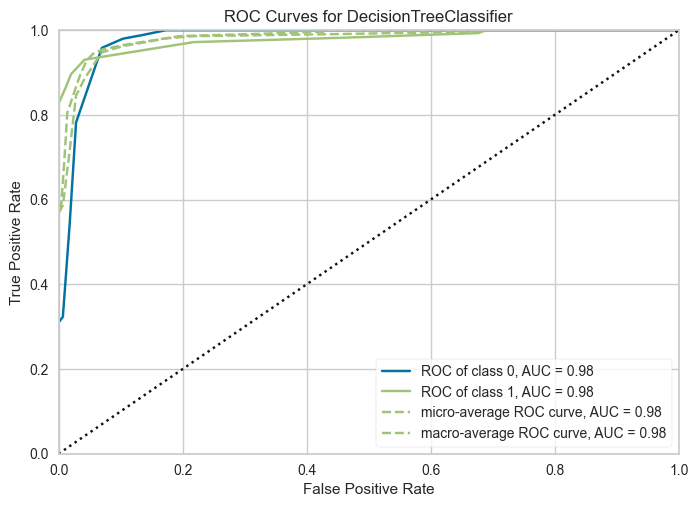

In [8]:
plot_model(best, plot = 'auc')

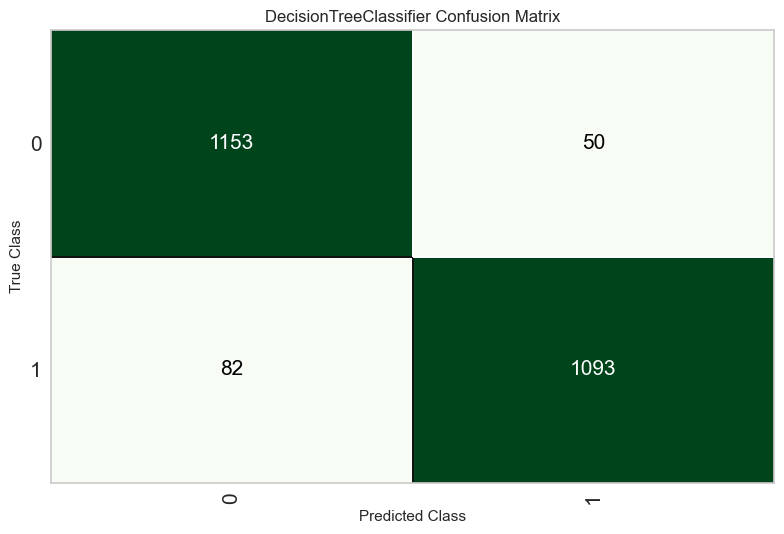

In [9]:
plot_model(best, plot = 'confusion_matrix')

In [10]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9445,0.9785,0.9445,0.9448,0.9445,0.8889,0.8893


In [11]:
holdout_pred.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score
3370,flat,scaly,brown,bruises,none,free,close,broad,white,tapering,...,partial,white,one,pendant,black,several,woods,edible,edible,0.9639
4466,flat,fibrous,gray,no,foul,free,close,broad,chocolate,enlarging,...,partial,white,one,large,chocolate,solitary,grasses,poisonous,poisonous,1.0000
4232,flat,smooth,white,bruises,foul,free,close,broad,pink,tapering,...,partial,white,one,pendant,chocolate,scattered,urban,poisonous,poisonous,0.5977
5058,convex,smooth,buff,bruises,foul,free,close,broad,white,tapering,...,partial,white,one,pendant,chocolate,scattered,urban,poisonous,edible,0.8066
6305,convex,smooth,red,no,foul,free,close,narrow,buff,tapering,...,partial,white,one,evanescent,white,several,path,poisonous,poisonous,1.0000


In [12]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [13]:
predictions = predict_model(best, data = new_data)
predictions.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,prediction_label,prediction_score
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,partial,white,one,pendant,black,scattered,urban,poisonous,0.7094
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,partial,white,one,pendant,brown,numerous,grasses,edible,0.8066
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,partial,white,one,pendant,brown,numerous,meadows,edible,0.8066
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,partial,white,one,pendant,black,scattered,urban,poisonous,0.7094
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,partial,white,one,evanescent,brown,abundant,grasses,edible,1.0000


In [14]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
s = setup(df2,log_experiment=True,experiment_name='211602C', session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(7932, 5)"
4,Transformed data shape,"(7932, 5)"
5,Transformed train set shape,"(5552, 5)"
6,Transformed test set shape,"(2380, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9431,0.9816,0.9325,0.9516,0.9417,0.8861,0.8867,0.0220
rf,Random Forest Classifier,0.9431,0.9819,0.9325,0.9516,0.9417,0.8861,0.8867,0.1660
gbc,Gradient Boosting Classifier,0.9431,0.9815,0.9325,0.9516,0.9417,0.8861,0.8867,0.1550
et,Extra Trees Classifier,0.9431,0.9816,0.9325,0.9516,0.9417,0.8861,0.8867,0.1340
qda,Quadratic Discriminant Analysis,0.9424,0.9777,0.9310,0.9515,0.9409,0.8847,0.8853,0.0210
lightgbm,Light Gradient Boosting Machine,0.9424,0.9817,0.9310,0.9515,0.9409,0.8847,0.8853,0.1420
lr,Logistic Regression,0.9400,0.9752,0.9245,0.9530,0.9382,0.8800,0.8809,0.0260
knn,K Neighbors Classifier,0.9391,0.9726,0.9241,0.9516,0.9373,0.8782,0.8791,0.0680
svm,SVM - Linear Kernel,0.9379,0.0000,0.9113,0.9616,0.9353,0.8756,0.8776,0.0270
nb,Naive Bayes,0.9373,0.9672,0.8967,0.9745,0.9338,0.8745,0.8775,0.0230


In [17]:
# check the final params of best model
best.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

In [18]:
new_data = df2.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

,cap-shape_flat,bruises,odor_none,gill-size
0,1.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [19]:
predictions = predict_model(best, data = new_data)
predictions.head()

,cap-shape_flat,bruises,odor_none,gill-size,prediction_label,prediction_score
0,1.0,1.0,1.0,0.0,0,1.0
1,0.0,1.0,0.0,1.0,1,1.0
2,0.0,1.0,0.0,0.0,1,1.0
3,0.0,1.0,0.0,0.0,1,1.0
4,0.0,1.0,0.0,0.0,1,1.0


In [20]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
model_uri = '\mlruns\902923692474014990\9afc6ed006d3419181bdc95dba545ce5'
mlflow.register_model(model_uri, 'Mushroom Classification')

Registered model 'Mushroom Classification' already exists. Creating a new version of this model...
Created version '2' of model 'Mushroom Classification'.


<ModelVersion: aliases=[], creation_timestamp=1708856015127, current_stage='None', description=None, last_updated_timestamp=1708856015127, name='Mushroom Classification', run_id=None, run_link=None, source='\\mlruns\\902923692474014990\\9afc6ed006d3419181bdc95dba545ce5', status='READY', status_message=None, tags={}, user_id=None, version=2>

In [22]:
final_best = finalize_model(best)
save_model(best,"../models/mushroomclass")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['cap-shape_flat', 'bruises',
                                              'odor_none', 'gill-size'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_mod

In [23]:
pipeline = load_model('../models/mushroomclass')


Transformation Pipeline and Model Successfully Loaded


In [24]:
predictions.head()

,cap-shape_flat,bruises,odor_none,gill-size,prediction_label,prediction_score
0,1.0,1.0,1.0,0.0,0,1.0
1,0.0,1.0,0.0,1.0,1,1.0
2,0.0,1.0,0.0,0.0,1,1.0
3,0.0,1.0,0.0,0.0,1,1.0
4,0.0,1.0,0.0,0.0,1,1.0


In [25]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7932 entries, 0 to 7931
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cap-shape_flat    7932 non-null   float32
 1   bruises           7932 non-null   float32
 2   odor_none         7932 non-null   float32
 3   gill-size         7932 non-null   float32
 4   prediction_label  7932 non-null   int32  
 5   prediction_score  7932 non-null   float64
dtypes: float32(4), float64(1), int32(1)
memory usage: 217.0 KB


In [ ]:
!mlflow ui